# SOPHY Database
### Southern Ocean Phytoplankton Database
- Made by Ayush Nag and Hannah-Joy Warren (add others)
- UW Oceanography (add other credits)

In [90]:
import sqlite3
import pandas as pd
import pyworms
from pandas import DataFrame
# import cartopy.feature
import matplotlib.pyplot as plt
import scipy.io as sio
from shapely.geometry import Polygon, Point, MultiPoint
# import cartopy.crs as ccrs
import numpy as np
import shapely
import matplotlib.path as mpath
import geopandas as gpd
from shapely.geos import lgeos
from shapely.geometry.base import geom_factory
from shapely.ops import transform
from shapely.ops import nearest_points
import shapely.validation
import pyproj

In [10]:
con = sqlite3.connect("sophy.db")
cur = con.cursor()

Sample functions to use

In [12]:
# functions with common use cases
# results at lat long
# distance and time for lat long
# take in a list of values that represent a path and get all results (within certain range of provided values )
# fronts, sectors
# default definition of sectors, fronts that can be easily updated 

# filter by front zones and sectors


Read from the SOPHY database and receive a DataFrame <br />
Write SQLite queries directly

In [20]:
import warnings


query = "select scientific_name from microscopy"
pd.read_sql_query(query, con)

,scientific_name
0,Plagioselmis prolonga
1,Teleaulax acuta
2,Adinimonas oviforme
3,Pachydinium mediterraneum
4,Amphisolenia bidentata
...,...
1567,Tripos teres
1568,Lebouridinium glaucum
1569,Tripos petersii
1570,Halamphora terroris


In [3]:
pd.read_pickle(r"C:\users\ayush nag\Downloads\data\02_intermediate\SOCCOM_bgc_argo_float_data\all_floatdata_analyzed.pkl")

,floatnum,date,Lat,Lon,mlp,Temperature,Salinity,Pressure,Depth,Sigma_theta,...,TALK_LIAR,pCO2_LIAR,N_PROF,AbsSalt,ConservTemp,PotDensity_kg_m3,InsituDensity,floatnum_nprof,MLD,doy
0,5904675,2016-01-13 07:34:00,-39.451,99.47,50.56,"[2.5593, 2.6215, 2.7097, 2.8429, 2.9544, 3.125...","[34.6566, 34.6251, 34.5933, 34.5586, 34.5265, ...","[1798.82, 1699.35, 1598.98, 1498.3, 1398.82, 1...","[1777.472, 1679.576, 1580.748, 1481.568, 1383....","[27.661, 27.63, 27.596, 27.556, 27.52, 27.469,...",...,"[2346.0, 2342.0, 2340.0, 2339.0, 2335.0, 2330....","[533.5, 543.6, 558.7, 569.4, 576.0, 578.8, 575...",0.0,"[34.82595535721135, 34.79407725005841, 34.7618...","[2.430856838546405, 2.5009163009840334, 2.5966...","[1027.6662554229647, 1027.6349357059116, 1027....","[1035.9427057410494, 1035.4596884950454, 1034....",5904675_0.0,50.263656,13
1,5904675,2016-01-23 16:15:00,-39.563,99.566,17.39,"[2.5736, 2.6411, 2.7379, 2.8338, 2.9767, 3.124...","[34.656, 34.6189, 34.5955, 34.5586, 34.5194, 3...","[1799.41, 1699.64, 1598.78, 1498.91, 1398.75, ...","[1778.034, 1679.844, 1580.535, 1482.154, 1383....","[27.66, 27.623, 27.596, 27.557, 27.513, 27.472...",...,"[2349.0, 2342.0, 2343.0, 2339.0, 2335.0, 2331....","[538.8, 546.9, 558.7, 569.1, 573.1, 574.0, 570...",1.0,"[34.82535309064243, 34.78784725522959, 34.7640...","[2.44490384079823, 2.5202879334917996, 2.62447...","[1027.6645827362636, 1027.6283215903147, 1027....","[1035.9430113967492, 1035.4535742652433, 1034....",5904675_1.0,17.405178,23
2,5904675,2016-02-02 23:45:00,-39.603,99.612,52.58,"[2.5567, 2.6335, 2.7503, 2.8623, 2.9733, 3.148...","[34.6547, 34.6232, 34.5874, 34.5537, 34.5251, ...","[1798.43, 1700.07, 1599.88, 1499.64, 1399.11, ...","[1777.063, 1680.261, 1581.612, 1482.868, 1383....","[27.66, 27.628, 27.588, 27.551, 27.517, 27.467...",...,"[2346.0, 2343.0, 2342.0, 2339.0, 2336.0, 2330....","[543.1, 553.2, 569.0, 578.2, 582.8, 581.8, 578...",2.0,"[34.82404599292884, 34.792169926889706, 34.755...","[2.4283489049490923, 2.5127101446961255, 2.636...","[1027.6649500625397, 1027.6324082483393, 1027....","[1035.9397942575665, 1035.4598927679708, 1034....",5904675_2.0,52.640543,33
3,5904675,2016-02-13 07:58:00,-39.8,99.781,48.72,"[2.5731, 2.626, 2.7259, 2.8515, 2.9946, 3.1686...","[34.6488, 34.6248, 34.5936, 34.5581, 34.5163, ...","[1798.67, 1699.46, 1599.35, 1498.73, 1400.11, ...","[1777.268, 1679.631, 1581.062, 1481.945, 1384....","[27.654, 27.629, 27.595, 27.555, 27.509, 27.46...",...,"[2345.0, 2343.0, 2341.0, 2339.0, 2335.0, 2330....","[542.8, 549.4, 563.2, 577.1, 580.8, 579.4, 574...",3.0,"[34.81811733768517, 34.79377543115336, 34.7621...","[2.4445533103254418, 2.505347931370142, 2.6126...","[1027.6588593527174, 1027.6343159723037, 1027....","[1035.934078536562, 1035.459364297524, 1034.96...",5904675_3.0,48.726109,44
4,5904675,2016-02-23 14:43:00,-39.94,99.788,57.20,"[2.5717, 2.6486, 2.7346, 2.8577, 3.002, 3.1533...","[34.6534, 34.6184, 34.5871, 34.553, 34.515, 34...","[1798.77, 1700.15, 1599.19, 1498.93, 1399.42, ...","[1777.344, 1680.289, 1580.884, 1482.123, 1384....","[27.658, 27.622, 27.589, 27.551, 27.507, 27.46...",...,"[2347.0, 2343.0, 2340.0, 2338.0, 2334.0, 2330....","[542.0, 553.2, 564.7, 574.2, 579.1, 581.0, 574...",4.0,"[34.82273216156776, 34.78733816450332, 34.7556...","[2.443114790457301, 2.527646665193389, 2.62127...","[1027.6626509837445, 1027.62728448975, 1027.59...","[1035.9383221922096, 1035.4545062675938, 1034....",5904675_4.0,57.116978,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10411,5904186,2015-02-08 20:03:00,-48.509,221.179,47.19,"[2.7834, 2.9152, 3.1154, 3.3354, 3.6846, 4.086...","[34.5182, 34.4804, 34.4343, 34.3937, 34.3522, ...","[1699.05, 1598.94, 1499.06, 1399.3, 1299.85, 1...","[1677.884, 1579.394, 1481.084, 1382.847, 1284....","[27.531, 27.488, 27.433, 27.38, 27.313, 27.249...",...,"[2331.0, 2324.0, 2315.0, 2311.0, 2305.0, 2299....","[569.1, 572.8, 565.2, 559.5, 547.8, 535.4, 524...",57.0,"[34.687044996778035, 34.64

In [94]:
# map_proj = ccrs.SouthPolarStereo()
# fig = plt.figure(figsize=[20, 20])  # inches
# ax = plt.subplot(projection=map_proj)
# ax.set_extent([-180, 180, -90, -39.4], ccrs.PlateCarree())
# fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)
#
# ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.COASTLINE)
# ax.gridlines(draw_labels=True)

# Writes the Kim & Orsi 2014 fronts to a shapefile
mat_data: dict = sio.loadmat("../data/fronts/ys_fronts.mat")
# fronts = ([[lat1, lon1], [lat2, lon2]], [[lat1, lon1], ...], ...)
orsi_fronts: tuple = mat_data['ys_fronts'].tolist()[0][0]
# filters out extra data and only keeps the 4 Southern Ocean fronts
orsi_fronts = orsi_fronts[:4]
colors = ['c', 'b', 'g', 'r']
wgs84 = pyproj.CRS('EPSG:4326')
utm = pyproj.CRS('EPSG:9354')

In [67]:
# front = orsi_fronts[0].T
# # remove points where latitude is negative (range is [0, 360])
# extra = np.where(front[0] < 0)
# lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
# lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
# # lat, lon = np.append(lat, lat[0]), np.append(lon, lon[0])
# points = np.stack((lat, lon), axis=-1)
# # new_points = map_proj.transform_points(ccrs.PlateCarree(), lat, lon)
# # points = np.round(points, 3)
# # poly = Polygon(points)
# plt.plot(lat, lon)
# plt.show()
# # ax.plot(front[0], front[1], marker='o', linestyle='', color=colors[i], transform=ccrs.PlateCarree())

transformed: list = []

for f in orsi_fronts:
    front = f.T
    extra = np.where(front[0] < 0)
    lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
    lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
    result = wgs84.transform_points(lat, lon, src_crs=utm)
    plt.plot(lat, lon)
plt.show()


KeyboardInterrupt: 

In [97]:
front = orsi_fronts[0].T
extra = np.where(front[0] < 0)
lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
polygon_geom = Polygon(zip(lat, lon))
shapely.validation.explain_validity(polygon_geom)
# ax.add_geometries([polygon_geom], crs=ccrs.SouthPolarStereo(), facecolor='b', edgecolor='red', alpha=0.8)
# plt.show()

'Self-intersection[350.051338146862 -44.767575935647]'

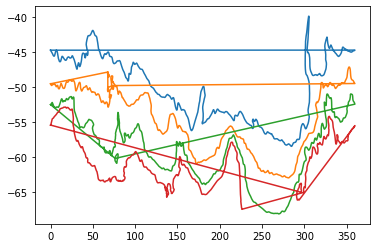

In [95]:
for i in range(len(orsi_fronts)):
    front = orsi_fronts[i].T
    extra = np.where(front[0] < 0)
    lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
    lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
    polygon_geom = Polygon(zip(lat, lon))
    x, y = polygon_geom.exterior.xy
    plt.plot(x, y)
plt.show()

In [99]:
wgs84 = pyproj.CRS('EPSG:4326')
utm = pyproj.CRS('EPSG:9354')

project = pyproj.Transformer.from_crs(wgs84, utm, always_xy=True).transform
f = transform(project, polygon_geom)
test = transform(project, Point(350.051338146862, -46.767575935647))


x, y = f.exterior.xy
plt.plot(x, y)
plt.scatter(350.051338146862, -44.767575935647)
plt.show()

print(polygon_geom.contains(Point(-183, -60)))

KeyboardInterrupt: 

In [33]:
mat_data: dict = sio.loadmat("../data/fronts/ys_fronts.mat")
# mat_data = ([[lat1, lon1], [lat2, lon2]], [[lat1, lon1], ...], ...)
orsi_fronts: tuple = mat_data['ys_fronts'].tolist()[0][0]
# filters out extra data and only keeps the 4 Southern Ocean fronts
orsi_fronts = orsi_fronts[:4]
fronts: list = []
for i in range(len(orsi_fronts)):
    front = orsi_fronts[i].T
    # data has points [-180, 360] but [-180, 180] is duplicate of [0, 360]
    extra = np.where(front[0] > 180)
    # delete [180, 360]
    lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
    # remove NaN's
    lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
    # np.stack(lat, lon)
    fronts.append(MultiPoint(np.stack((lat, lon), axis=-1)))

print(fronts[0])

MULTIPOINT (-180 -50.0209936665392, -179.6666666666666 -49.96500393180323, -179.3333333333333 -49.93096269227755, -179 -49.94078536865769, -178.6666666666666 -50.04969984288564, -178.5728563253229 -50.11754964963636, -178.3898747998656 -50.33081097350929, -178.3333333333333 -50.391325705011, -178.2085208945344 -50.54311941263899, -178 -50.73059466208869, -177.9654630961744 -50.75447632256316, -177.6666666666666 -50.93068101533926, -177.5914440074965 -50.96488310465381, -177.3333333333333 -51.1661654981078, -177.3159360434412 -51.17434120535174, -177.3333333333333 -51.1931099360373, -177.5330870629908 -51.38285211540524, -177.6666666666666 -51.42134168238364, -178 -51.54714179421074, -178.0901607536934 -51.59041736911299, -178.3333333333333 -51.71738303553338, -178.4524043036359 -51.79703854357142, -178.6666666666666 -51.94846434025763, -178.753054534832 -52.00271725792643, -179 -52.14588031301586, -179.1607531833552 -52.20745517263001, -179.3333333333333 -52.28179398784359, -179.599552

In [40]:
p = Point(-183, -56)
p1 = nearest_points(p, fronts[0])
print(p1[1])
p2 = nearest_points(p, fronts[1])
print(p2[1])
p3 = nearest_points(p, fronts[2])
print(p3[1])
p4 = nearest_points(p, fronts[3])
print(p4[1])
print(p.distance(p1))
print(p.distance(p2))
print(p.distance(p3))
print(p.distance(p4))

POINT (-180 -55.21364834718325)
POINT (-180 -60.53868389804866)
POINT (-180 -63.8318614434252)
POINT (-180 -65.32286148604106)


AttributeError: 'tuple' object has no attribute '_geom'